In [62]:
import tensorflow as tf
from tensorflow.keras import utils,layers,Sequential
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [63]:
model = tf.keras.models.load_model('model.keras')

In [64]:
model.summary()

Model: "Detect_Defected_Tires"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 220, 220, 128)  │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_1 (MaxPooling2D)        │ (None, 110, 110, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_1                     │ (None, 110, 110, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 106, 106, 64)   │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_2 (MaxPooling2D)        │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_2                     │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv2D)                 │ (None, 49, 49, 32)     │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_3 (MaxPooling2D)        │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_3                     │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_4 (Conv2D)                 │ (None, 20, 20, 16)     │        12,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_4 (MaxPooling2D)        │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_4                     │ (None, 10, 10, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │         1,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,445 (3.14 MB)

 Trainable params: 274,321 (1.05 MB)

 Non-trainable params: 480 (1.88 KB)

 Optimizer params: 548,644 (2.09 MB)

In [65]:
dict = {0:'defective',1:'good'}

def read_imgs(path):
    imgs = []
    labels = []
    for folder in os.listdir(path):
        # handle hidden files
        if folder.startswith('.'):
            continue
        for img in os.listdir(path + folder):
            if img.startswith('.'):
                continue
            im = cv2.imread(path + folder + '/' + img)
            im = cv2.resize(im, (224, 224))
            imgs.append(im)
            label = 0 if folder == 'defective' else 1
            labels.append(label)
    return imgs, np.array(labels)

x, y = read_imgs('test/')

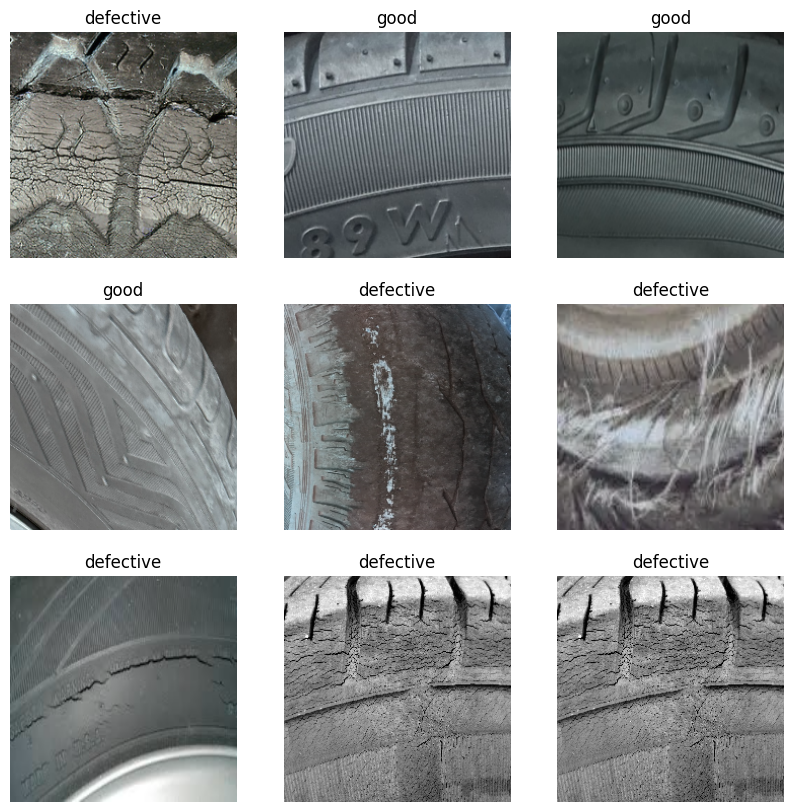

In [66]:
import random
# show some random images
plt.figure(figsize=(10, 10))
random_indices = random.sample(range(len(x)), 9)  # Select 9 random indices
for i, index in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x[index])
    plt.title('defective' if y[index] == 0 else 'good')
    plt.axis('off')

In [67]:
def preprocess(image):
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # normalize
    norm = gray / 255.0
    return norm

x_norm = np.array([preprocess(img) for img in x])

In [68]:
x_norm.shape

(38, 224, 224)

In [69]:
# predict 
predictions = model.predict(x_norm.reshape(-1, 224, 224, 1))

# get the predicted labels
predicted_labels = np.where(predictions > .5, 1, 0)

# get the true labels
true_labels = y

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


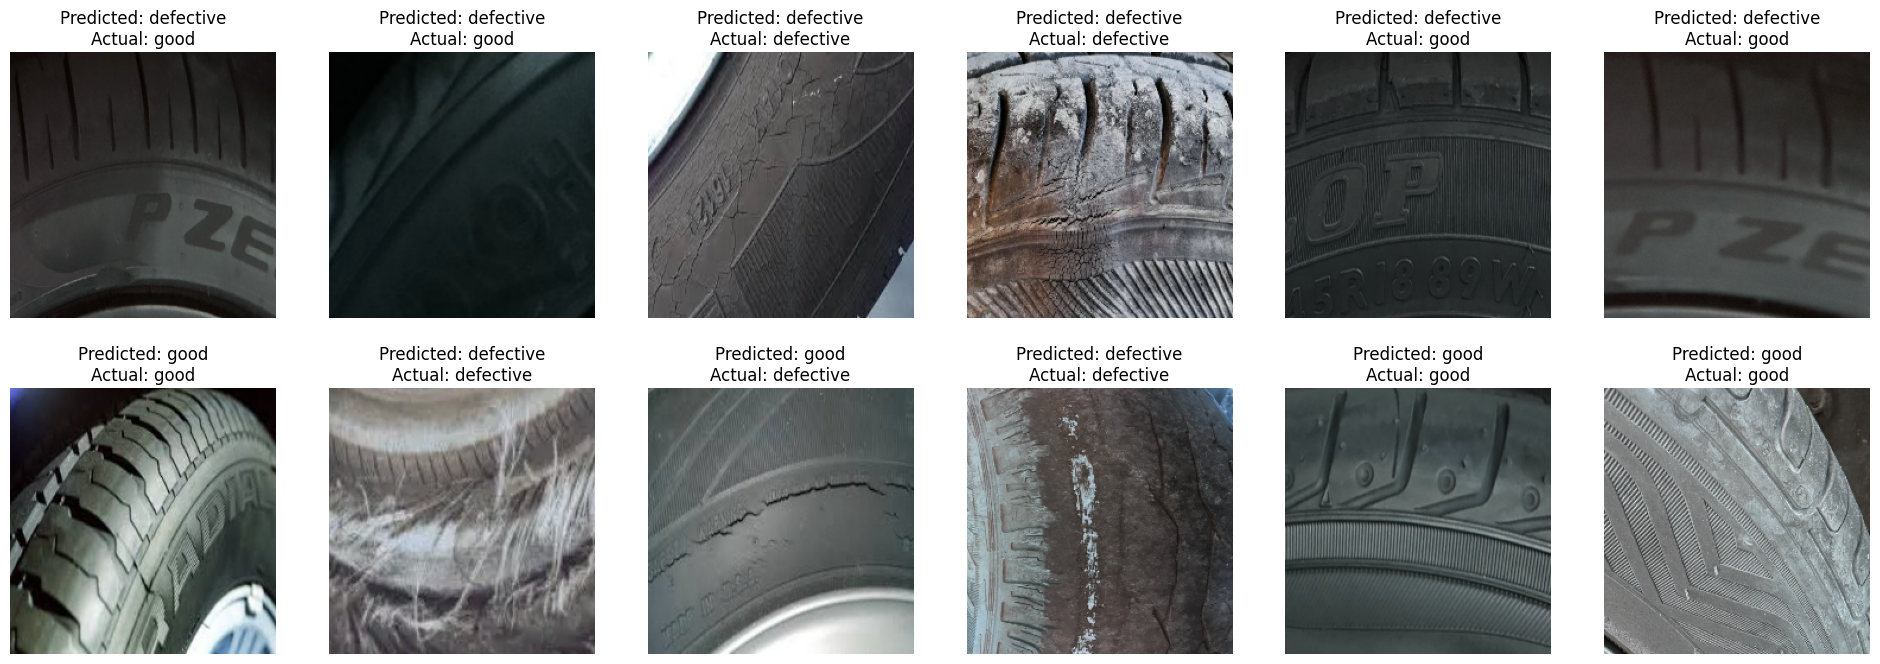

In [80]:
# display results
plt.figure(figsize=(24, 8))
random_indices = random.sample(range(len(x)), 12)  # Select 12 random indices
for i, index in enumerate(random_indices):
    plt.subplot(2, 6, i + 1)  # Change the subplot parameters to 6 by 2
    plt.imshow(x[index], cmap='gray')
    plt.title(f'Predicted: {dict[predicted_labels[index][0]]}\nActual: {dict[true_labels[index]]}')
    plt.axis('off')

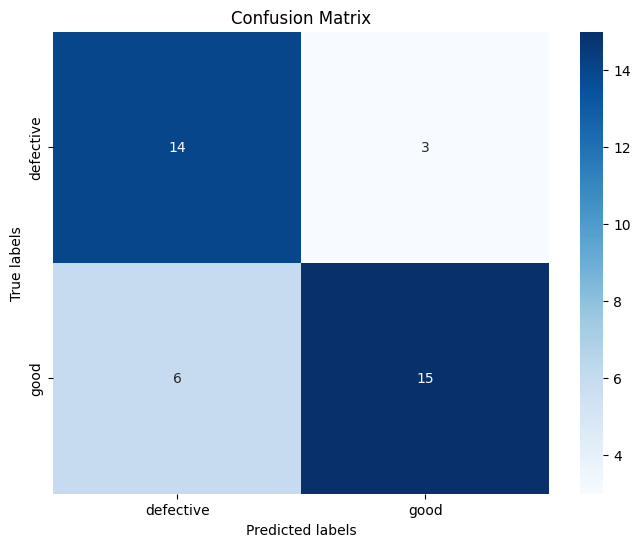

In [82]:
cm = confusion_matrix(true_labels, predicted_labels)
# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['defective', 'good'], yticklabels=['defective', 'good'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()